In [1]:
# 复合分析
# 1.交叉分析
# 2.分组与钻取
# 3.相关分析
# 4.因子分析
# 5.聚类分析
# 6.回归分析

### 交叉分析

In [2]:
# 分析属性与属性之间的关系

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("./data/HR.csv")
# df = df[df<df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25))][df>df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25))]
df = df[df["last_evaluation"]<1]

In [27]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low
14999,NaN,0.52,2,158,3,0,1,0,support,low


In [28]:
# 研究各个部门之间的离职率是否有差异，利用独立T检验方法

In [29]:
# 先按照部门进行分组,并得到分组后的索引
dp_indices = df.groupby(by='department').indices
dp_indices

{'IT': array([   59,    60,    61, ..., 14650, 14651, 14656]),
 'RandD': array([  289,   290,   291,   292,   431,   432,   433,   434,   574,
          575,   576,   577,   578,   791,   792,   793,   794,   934,
          935,   936,   937,   938,  1004,  1005,  1006,  1007,  1008,
         1155,  1156,  1225,  1226,  1227,  1228,  1229,  1298,  1299,
         1300,  1301,  1302,  1303,  1372,  1373,  1374,  1375,  1376,
         1377,  1447,  1448,  1449,  1450,  1451,  1522,  1523,  1524,
         1525,  1526,  1595,  1596,  1597,  1598,  1599,  1668,  1669,
         1670,  1671,  1737,  1738,  1739,  1740,  1741,  1811,  1812,
         1813,  1814,  1815,  1886,  1887,  1888,  1889,  1961,  1962,
         1963,  1964,  1965,  2036,  2037,  2038,  2039,  2040,  2112,
         2113,  2114,  2115,  2116,  2187,  2188,  2189,  2190,  2191,
         2262,  2263,  2264,  2265,  2266,  2338,  2339,  2340,  2341,
         2342,  2414,  2415,  2416,  2417,  2418,  2491,  2492,  2493,
     

In [37]:
# 选取其中的两组值进行分析
sales_values = df['left'].iloc[dp_indices['sales']].values
# sales_values
technical_values = df['left'].iloc[dp_indices['technical']].values
# 查看其T统计量
ss.ttest_ind(sales_values, technical_values)

Ttest_indResult(statistic=-0.7120485065071629, pvalue=0.47645949141272503)

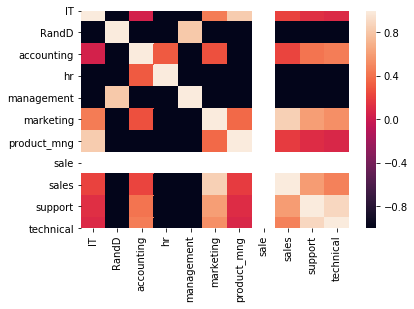

In [45]:
# 两两求p值
# 取键值 键值是各个部门的名字
dp_keys = list(dp_indices.keys())
# dp_keys
# 初始化一个矩阵 (全0矩阵)
dp_t_mat = np.zeros([len(dp_keys), len(dp_keys)])
# dp_t_mat
# 遍历
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        # 取p值 (求独立T检验值), 单独求P值索引取1
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values, df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        # 为矩阵赋值
        if p_value<0.05:
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
# 利用heatmap画图 (颜色越深越接近于0，可认为两者之间没有关系)
sns.heatmap(dp_t_mat, xticklabels=dp_keys, yticklabels=dp_keys)
plt.show()

#### 通过透视表进行交叉分析

In [49]:
df = pd.read_csv("./data/HR.csv")
df = df[df["last_evaluation"]<1][df["salary"]!="nme"]
# 创建一个透视表 pivot_table 
# Work_accident 工作事故 0没有工作事故 1有工作事故
piv_tb = pd.pivot_table(df, values='left', index=['promotion_last_5years', 'salary'], columns=['Work_accident'], aggfunc=np.mean)
piv_tb

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.083503  0.000000
                      low     0.323983  0.087302
                      medium  0.223279  0.077098
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.000000

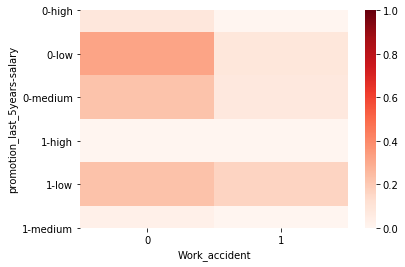

In [58]:
# 画图 (值越大，颜色越深，离职率越高)
# vmin 最小值  vmax 最大值
# cmap 自定义颜色
# 调整字体大小
sns.set_context(font_scale=1.5)
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds', n_colors=256))
plt.show()

### 分组分析 

In [59]:
# 两种不同的含义
# 含义1:将数据分组后再进行分析比较
# 含义2:根据数据的特征将数据进行切分，分成不同的组，使得组内成员尽可能靠拢，组间的成员尽可能远离。

In [60]:
# 分组分析最常用到的手段就是钻取
# 钻取：是改变维的层次，变换分析的粒度
# 根据钻取方向的不同可以分为
# 向上钻取：就是汇总分组数据的过程。比如知道每个人的平均数，汇总成每个班的平均数。
# 向下钻取：就是展开数据，查看数据细节的过程。比如想要知道每个班平均成绩下，男生和女生分别的平均成绩

In [61]:
# 离散属性的分组比较容易。连续属性的分组，在分组前需要进行离散化，在进行离散化之前还要观察数据的分布，观察是否有明显的可以区分的标志，比如
# 将数据按照从小到大的顺序排列后，观察是否有明显的分割点或拐点，如果有可以直接使用
# 分割（一阶差分），相邻两个数据的差
# 拐点（二阶差分）
# 思路二：
# 连续属性的分组要尽可能满足相同的分组比较聚拢，不同的分组比较分离的特点。因此可以使用聚类的方法进行连续属性的分组。方法k-means、不纯度Gini

In [62]:
# 衡量不纯度的指标，Gini系数
# 连续值Gini系数的计算
# 1.现将表按照连续值的大小进行排序。
# 2.然后相邻两两之间划定界限，分别确定分组值，分别计算Gini系数，取Gini系数最小的切分为界。
# 3.最后根据目标标注对连续值进行分组

##### 代码实现

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


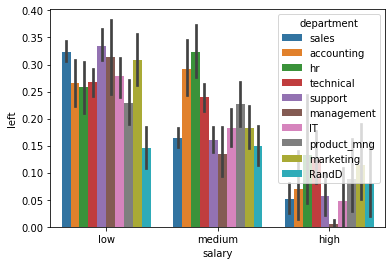

In [66]:
df = pd.read_csv("./data/HR.csv")
df = df[df["last_evaluation"]<1][df["salary"]!="nme"]
# hue 向下钻取
sns.barplot(x='salary', y='left', hue='department', data=df)
plt.show()

In [68]:
# 连续值
df = pd.read_csv("./data/HR.csv")
df = df[df["last_evaluation"]<1][df["salary"]!="nme"]
sl_s = df['satisfaction_level']
# y轴根据值进行排序
sns.barplot(list(range(len(sl_s))), sl_s.sort_values())
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a1a4e1320> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a1a5a8cb0> (for post_execute):


KeyboardInterrupt: 